# Evaluate all checkpoints for a single run

In [7]:
import warnings
warnings.filterwarnings('ignore')  # or 'once'  

In [8]:
import sys
sys.path.append('utils')

import pyforest

from datetime import datetime
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai
import gc
from nn_utils_eff import *
from augmentation import *



USES_TIMM = True
USES_GCHKPT = True
ARCH = 'tf_efficientnet_b4_ns'   # xresnet50 # resnet101

CHOSEN_SAMPLE_SIZE = 7500  #1100 # 2500  # use this to control per-category sample sizes # 1000
TEST_SET_SIZE = 500  # number of images per category to put in the test set

remove_from_sample = {
#         'A': 0.5,
    'B': 0.4,
#     'C': 0.2,
# #     'D': 0.3,
#     'E': 0.2,
    'F': 0.4,
    'G': 0.3, # 0.8,
    'H': 0.4,
    'K': 0.4,
# #     'L': 0.7,
    'M': 0.6,
# #     'N': 0.9,
# #     'O': 0.2,
    'P':0.4,
    'Q': 0.6,
# #     'R': 0.4,
#     'U': 0.2
# #     'Y': 0.8 

}  # fractions of original samples to keep

add_to_sample = {  # Use this minimally until we add NEW samples rather than oversampling.
#     'A': 0.2,
#     'B': 0.2,
#     'G': 0.1,
#     'I': 0.3,
#     'K': 0.2,
#    'M': 0.2,
    'N': 0.9,
    'O': 0.2,
#     'R': 0.3,
#     'S': 0.4,
#     'T': 0.4,
    'V': 0.2,
#     'W': 0.1,
#     'Y': 0.2
}

remove_from_sample = {}
add_to_sample={}

AVG_SAMPLES = 3000  # Set this to the average number of samples per category - TOTAL = AVG*24 letters

FROZEN_EPOCHS = 1  # 1
EPOCHS = 5  # 4
BATCH_SIZE = 48  # 16
RESOLUTION = 380  # 300

PRETRAINED_FLAG = True
GRAD_ACC = 128 # set this to 64 when testing with low data.  Set it to 128, 192 or 256 when using lots of data.
VALID_PERC = 0.2

# data = 'combined3-proc2'
# data = 'combined4'
# data = 'combined5-noexternal'
data = 'combined4_with_overflow_all_d'



rn_addon = f'_data={data}'
curr_time = str(datetime.today().strftime("%Y%m%d-%H%M"))


# set this to None if training a new model from scratch
PREV_TRAINED_MODEL_RUN_NAME = None
PREV_TRAINED_MODEL_EPOCH = None




import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
# %matplotlib widget
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 120
plt.style.use('dark_background')







In [9]:
# path = '../data/external/Training_Set'
path = f'../data/{data}/Training_Set'
# path2 = '../data/frank-ledlights-L'
path2 = None



EPOCH #0



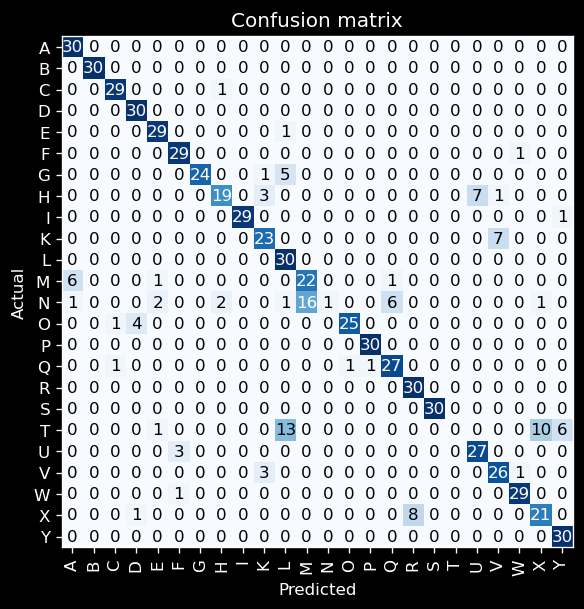

              precision    recall  f1-score   support

           A       0.81      1.00      0.90        30
           B       1.00      1.00      1.00        30
           C       0.94      0.97      0.95        30
           D       0.86      1.00      0.92        30
           E       0.88      0.97      0.92        30
           F       0.88      0.97      0.92        30
           G       1.00      0.80      0.89        30
           H       0.86      0.63      0.73        30
           I       1.00      0.97      0.98        30
           K       0.77      0.77      0.77        30
           L       0.60      1.00      0.75        30
           M       0.58      0.73      0.65        30
           N       1.00      0.03      0.06        30
           O       0.96      0.83      0.89        30
           P       0.97      1.00      0.98        30
           Q       0.79      0.90      0.84        30
           R       0.79      1.00      0.88        30
           S       1.00    



EPOCH #1



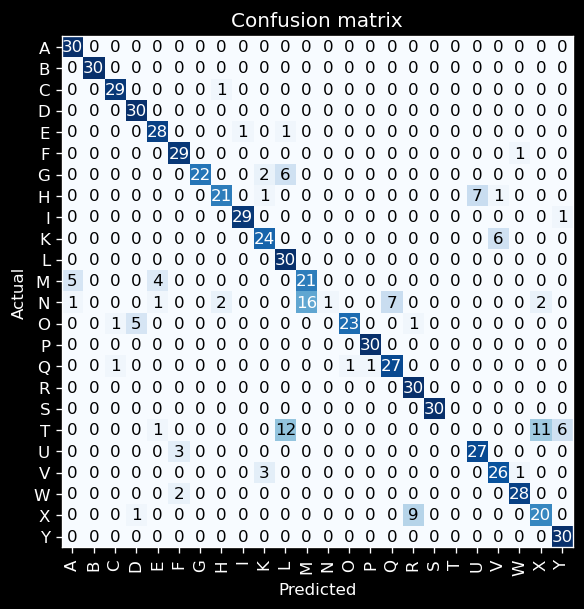

              precision    recall  f1-score   support

           A       0.83      1.00      0.91        30
           B       1.00      1.00      1.00        30
           C       0.94      0.97      0.95        30
           D       0.83      1.00      0.91        30
           E       0.82      0.93      0.87        30
           F       0.85      0.97      0.91        30
           G       1.00      0.73      0.85        30
           H       0.88      0.70      0.78        30
           I       0.97      0.97      0.97        30
           K       0.80      0.80      0.80        30
           L       0.61      1.00      0.76        30
           M       0.57      0.70      0.63        30
           N       1.00      0.03      0.06        30
           O       0.96      0.77      0.85        30
           P       0.97      1.00      0.98        30
           Q       0.79      0.90      0.84        30
           R       0.75      1.00      0.86        30
           S       1.00    



EPOCH #2



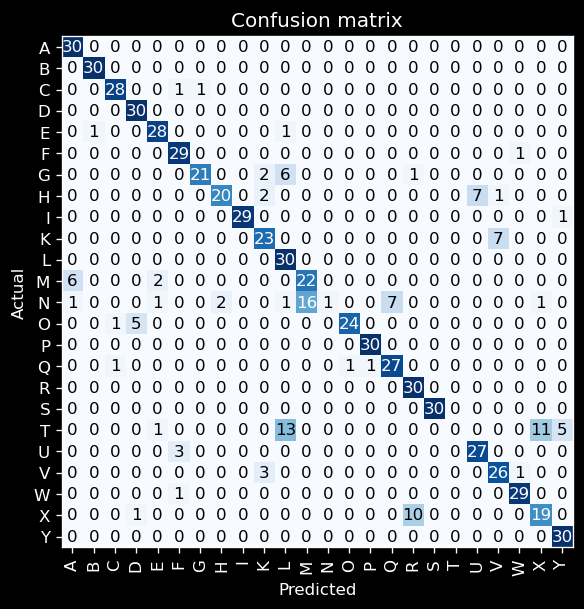

              precision    recall  f1-score   support

           A       0.81      1.00      0.90        30
           B       0.97      1.00      0.98        30
           C       0.93      0.93      0.93        30
           D       0.83      1.00      0.91        30
           E       0.88      0.93      0.90        30
           F       0.85      0.97      0.91        30
           G       0.95      0.70      0.81        30
           H       0.91      0.67      0.77        30
           I       1.00      0.97      0.98        30
           K       0.77      0.77      0.77        30
           L       0.59      1.00      0.74        30
           M       0.58      0.73      0.65        30
           N       1.00      0.03      0.06        30
           O       0.96      0.80      0.87        30
           P       0.97      1.00      0.98        30
           Q       0.79      0.90      0.84        30
           R       0.73      1.00      0.85        30
           S       1.00    

KeyboardInterrupt: 

In [4]:
cleanup()

import sys
sys.path.append('utils')

import pyforest

from datetime import datetime
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai
import gc
from nn_utils_eff import *
from augmentation import *

RESOLUTION=380
BATCH_SIZE=48

# RUN_NAME = '20210303-1849 - arch=tf_efficientnet_b4_ns - samples=1100 frozen=1 epochs=15 bs=48 res=380 _data=combined2' # OLD OLD BAD
# RUN_NAME = '20210323-0353 - arch=tf_efficientnet_b4_ns - samples=7500 frozen=1 epochs=5 bs=48 res=380 _data=combined4_with_overflow_all_d'  # OK 3
# RUN_NAME = '20210322-2255 - arch=tf_efficientnet_b4_ns - samples=7500 frozen=1 epochs=4 bs=48 res=380 _data=combined4_with_overflow_all_d' MEH
RUN_NAME = '20210321-0349 - arch=tf_efficientnet_b4_ns - samples=7500 frozen=1 epochs=48 bs=48 res=380 _data=combined4_with_overflow_all_d' # GREAT 20

test_learn = load_learner(f'../models/{RUN_NAME}.pkl', cpu=False)

test_learn.remove_cbs([ModelToHalf, NonNativeMixedPrecision])
# test_learn.remove_cbs(cbs)

def get_test_fnames2(path):
    l = get_image_files(Path('../data/test1/Training_Set')) 
    return random.sample(l, int(len(l)))

item_tfms = [ToTensor(), AlbumentationsTransform(get_train_aug(RESOLUTION), get_valid_aug(RESOLUTION))]
batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats)]

test_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_test_fnames2,
    get_y=parent_label, 
    item_tfms=item_tfms, batch_tfms=batch_tfms)

dls = test_db.dataloaders(path, bs=int(BATCH_SIZE/6))

test_dl = dls.test_dl(get_test_fnames2('None'), with_labels=True)

acc = []  # holds our accuracy data

for num in range(45):
    # num=14
    load_model(f'models/{RUN_NAME}_{num}.pth', test_learn, opt=ranger, with_opt=False)

    inputs, preds, targs, decoded, losses = test_learn.get_preds(dl=test_dl, with_input=True, with_decoded=True, with_loss=True)
    interp = ClassificationInterpretation(dl=test_dl, inputs=inputs, preds=preds, targs=targs, decoded=decoded, losses=losses )

    print(f'\n\nEPOCH #{num}\n')
    interp.plot_confusion_matrix(figsize=(5,5))
    plt.show()
    interp.print_classification_report()
    print('------------')

In [ ]:
import os
import shutil


shutil.copyfile('Eval1.ipynb', f'Archive/Eval1 - {RUN_NAME}.ipynb')